In [1]:
!pip3 install fastbook
import fastbook
fastbook.setup_book()
import os
os.environ["OMP_NUM_THREADS"] = "1" 

In [2]:
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path

In [3]:
path = Path('/Users/Leah/wound/burn')
leafs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128))

In [4]:
dls = leafs.dataloaders(path)

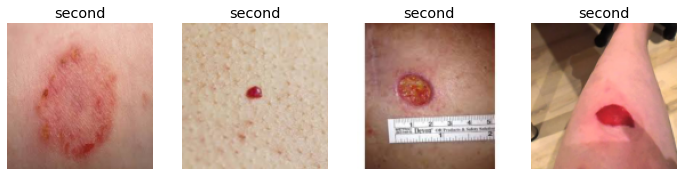

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

In [8]:
leafs = leafs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = leafs.dataloaders(path)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/Leah/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.620213,0.795852,0.326531,01:43


epoch,train_loss,valid_loss,error_rate,time
0,1.204059,0.765438,0.310204,02:00
1,1.068246,0.882548,0.318367,02:00
2,0.960339,0.817456,0.285714,02:02
3,0.880821,0.797923,0.293878,02:03


In [34]:
learn.export('burn.pkl')
path = Path()
learn_inf = load_learner(path/'burn.pkl')

In [33]:
learn.predict(f"/Users/Leah/wound/burn/test/second/img1258.jpg")

('second', tensor(1), tensor([0.0038, 0.9648, 0.0315]))